In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas
import lsqfit
import gvar as gv

load the files

In [2]:
# data = pandas.read_csv('NormanData/FinalData/simulation_production_run_on_ibm_nairobi_data=2022-09-10_3qubits_cbqi25b4fms1nkdes8fg.csv')
# data2 = pandas.read_csv('NormanData/FinalData/[DD]simulation_production_run_on_ibm_nairobi_data=2022-09-10_3qubits_63067c74e9f73b717085437c.csv')
data = pandas.read_csv('ClementData/simulation_production_run_on_ibm_nairobi_data=2022-09-12_7qubits_ccfpd42pr43cku82ufkg.csv')
data2 = pandas.read_csv('ClementData/simulation_production_run_on_ibm_nairobi_data=2022-09-14_7qubits_6320fab55ccea78b019435f8.csv')

In [3]:
ddict = data2.to_dict()
ddict0 = data.to_dict()
three_site = True

In [4]:
i = 15
len(data2['counts bare'])

1202

generate the readout correction matrxi

In [5]:
np.binary_repr(int('0x3f8', 16))[:7]

'1111111'

In [6]:
eval(data2['counts bare'][1201])

{'0x1180': 1,
 '0x1680': 1,
 '0x1780': 7,
 '0x1a80': 2,
 '0x1b80': 2,
 '0x1d80': 1,
 '0x1e80': 6,
 '0x1f00': 3,
 '0x1f80': 56,
 '0x2780': 3,
 '0x2b80': 3,
 '0x2d80': 2,
 '0x2e80': 8,
 '0x2f00': 4,
 '0x2f80': 58,
 '0x3380': 3,
 '0x3580': 2,
 '0x3680': 6,
 '0x3700': 1,
 '0x3780': 49,
 '0x3880': 2,
 '0x3980': 1,
 '0x3a80': 10,
 '0x3b00': 3,
 '0x3b80': 69,
 '0x3c80': 13,
 '0x3d00': 1,
 '0x3d80': 50,
 '0x3e00': 12,
 '0x3e80': 256,
 '0x3f00': 63,
 '0x3f80': 1300,
 '0xe80': 1,
 '0xf80': 1}

In [7]:
mats = np.zeros((7, 2, 2))
counts1 = eval(data2['counts bare'][1200])
counts2 = eval(data2['counts bare'][1201])
for key in counts1.keys():
    print(key[:4])
    key2 = np.binary_repr(int(key, 16), width=7)
#     print(key2)
    for j in range(7):
        if key2[j] == '0':
            mats[j, 0, 0] += counts1[key] / 4000
        else:
            mats[j, 0, 1] += counts1[key] / 4000
        if key2[j] == '0':
            mats[j, 1, 1] += counts1[key] / 4000
        else:
            mats[j, 1, 0] += counts1[key] / 4000
            
for key in counts2.keys():
    key2 = (np.binary_repr(int(key, 16), width=7))
    print(key2)
    for j in range(7):
#         if j == 0:
#             print(key2[j])
        if key2[j] == '0':
            mats[j, 1, 0] += counts2[key] / 4000
        else:
            mats[j, 1, 1] += counts2[key] / 4000
        if key2[j] == '0':
            mats[j, 0, 1] += counts2[key] / 4000
        else:
            mats[j, 0, 0] += counts2[key] / 4000
            
print(mats)
        
reflect_mat = np.identity(1)
for j in range(7):
    reflect_mat = np.kron(reflect_mat, np.linalg.inv(mats[j]))

0x0
0x10
0x10
0x12
0x14
0x20
0x20
0x24
0x28
0x28
0x40
0x80
0x80
0x90
0xc0
1000110000000
1011010000000
1011110000000
1101010000000
1101110000000
1110110000000
1111010000000
1111100000000
1111110000000
10011110000000
10101110000000
10110110000000
10111010000000
10111100000000
10111110000000
11001110000000
11010110000000
11011010000000
11011100000000
11011110000000
11100010000000
11100110000000
11101010000000
11101100000000
11101110000000
11110010000000
11110100000000
11110110000000
11111000000000
11111010000000
11111100000000
11111110000000
111010000000
111110000000
[[[0.95    0.05   ]
  [0.05    0.95   ]]

 [[0.978   0.022  ]
  [0.022   0.978  ]]

 [[0.982   0.018  ]
  [0.018   0.982  ]]

 [[0.9755  0.0245 ]
  [0.0245  0.9755 ]]

 [[0.98    0.02   ]
  [0.02    0.98   ]]

 [[0.922   0.078  ]
  [0.078   0.922  ]]

 [[0.95875 0.04125]
  [0.04125 0.95875]]]


/var/folders/df/plqx6fgd0_v3630nqhpjszf80000gq/T/ipykernel_37991/1037557517.py:6: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  key2 = np.binary_repr(int(key, 16), width=7)
/var/folders/df/plqx6fgd0_v3630nqhpjszf80000gq/T/ipykernel_37991/1037557517.py:19: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.
  key2 = (np.binary_repr(int(key, 16), width=7))


generating all the data points needed to make the appropriate time evolution

In [8]:
exact = np.array([ 0.062, -0.864,  0.024,  1.014,  0.208, -0.836, -0.062,  0.984,
        0.262, -0.78 , -0.092,  0.958,  0.32 , -0.708, -0.13 ,  0.884,
        0.41 , -0.694, -0.282,  0.852])

In [9]:
rescalend_data = [[] for j in range(20)]
evolutionnd_data = [[] for j in range(20)]
rescalendro_data = [[] for j in range(20)]
evolutionndro_data = [[] for j in range(20)]
rescale_data = [[] for j in range(20)]
evolution_data = [[] for j in range(20)]
rescale_ro_data = [[] for j in range(20)]
evolution_ro_data = [[] for j in range(20)]
for i in range(1200):
    index1 = int(ddict['nt'][i]) - 1
#     index1 = i // 60
    print(index1)
#     print(ddict['sim type'][i])
#     if ddict['sim type'][i] == 'evolution':
    counts = ddict['counts bare'][i]
    op2 = np.array([1 if np.binary_repr(k, width=7)[::2].count('1') % 2 == 1 else 0 for k in range(2 ** 7)])
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    op = np.kron(np.ones(4), np.kron(op, np.ones(4)))
    op = op# * op2
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(2 ** 7)

        norm = 0
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=7)
#             print(key2[::2].count('1'))
            if key2[::2].count('1') % 2 == 1:
                norm += counts[key]
                vector[int(key, 16)] += counts[key]
                if key2.count('1') % 2 == 0:
                    value += counts[key]
                else:
                    value -= counts[key]
        if norm == 0:
            evolution_data[index1].append(0)
        else:
            evolution_data[index1].append(value / norm)

        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=7)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        vector /= sum(counts.values())
        vector = reflect_mat @ vector
        evolution_data[index1].append(value / sum(counts.values()))
        vector /= sum(counts.values())
        evolution_ro_data[index1].append(vector @ (op * vector))
    else:
        value = 0
        vector = np.zeros(2 ** 7)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=7)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == '0':
                value += counts[key]
            else:
                value -= counts[key]
        rescale_data[index1].append(value / sum(counts.values()))
        vector /= sum(counts.values())
        vector = vector @ reflect_mat
        rescale_ro_data[index1].append(vector @ (op * vector))
#     break
#     continue
#     index1 = int(ddict0['nt'][i]) - 1
    counts = ddict0['counts mitigated'][i]
#     op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else 0 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
#         vector = np.zeros(8)
        vector = np.zeros(2 ** 7)

        norm = 0
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=7)
#             print(key2[::2].count('1'))
            if key2[::2].count('1') % 2 == 1:
                norm += counts[key]
                vector[int(key, 16)] += counts[key]
                if key2.count('1') % 2 == 0:
                    value += counts[key]
                else:
                    value -= counts[key]
        if norm == 0:
            evolutionnd_data[index1].append(0)
        else:
            evolutionnd_data[index1].append(value / norm)
    else:
        value = 0
#         vector = np.zeros(8)
        vector = np.zeros(2 ** 7)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=7)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        rescalend_data[index1].append(value / sum(counts.values()))
            
            
#     index1 = int(ddict0['nt'][i]) - 1
    counts = ddict0['counts bare'][i]
#     op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else 0 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
#         vector = np.zeros(8)
        vector = np.zeros(2 ** 7)

        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=7)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        evolutionndro_data[index1].append(value / sum(counts.values()))
    else:
        value = 0
#         vector = np.zeros(8)
        vector = np.zeros(2 ** 7)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=7)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        rescalendro_data[index1].append(value / sum(counts.values()))
#     break
evolution_data = np.array(evolution_data).transpose()
rescale_data = np.array(rescale_data).transpose()
evolutionnd_data = np.array(evolutionnd_data).transpose()
rescalend_data = np.array(rescalend_data).transpose()
evolutionndro_data = np.array(evolutionndro_data).transpose()
rescalendro_data = np.array(rescalendro_data).transpose()
evolution_ro_data = np.array(evolution_ro_data).transpose()
rescale_ro_data = np.array(rescale_ro_data).transpose()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8


In [10]:
evolutionnd_data.shape

(30, 20)

In [13]:

gv_raw = gv.gvar(np.mean(evolutionnd_data, axis=0), np.std(evolutionnd_data, axis=0) / np.sqrt(30))
gv_ropt = gv.gvar(np.mean(evolutionndro_data, axis=0), np.std(evolutionndro_data, axis=0) / np.sqrt(30))
gv_roptres = gv.gvar(np.mean(rescalendro_data, axis=0), np.std(rescalendro_data, axis=0) / np.sqrt(30))
gv_roptresf = gv_ropt / gv_roptres
# gv_roptres = gv.gvar(np.mean(res_ro, axis=0), np.std(res_ro, axis=0) / np.sqrt(30))

In [21]:
arr = [gv.mean(gv_raw), gv.sdev(gv_raw)]
np.savetxt('ProcessedData/m=2ns=4/finalnoreadoutnodynamicdecoupling_nairobi.csv', arr)
arr = [gv.mean(gv_ropt), gv.sdev(gv_ropt)]
np.savetxt('ProcessedData/m=2ns=4/finalreadoutnodynamicdecoupling_nairobi.csv', arr)
arr = [gv.mean(gv_roptres), gv.sdev(gv_roptres)]
np.savetxt('ProcessedData/m=2ns=4/finalreadoutrescalingnodynamicdecoupling_nairobi.csv', arr)

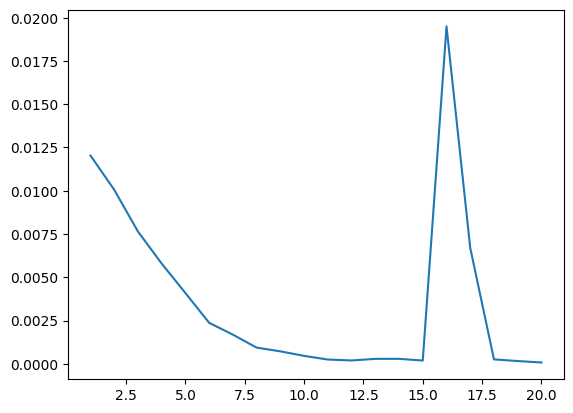

In [19]:
plt.plot(np.linspace(1, 20, 20), np.mean(rescale_ro_data, axis=0))

In [288]:
colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (240, 228, 66), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

import matplotlib as mpl
from  matplotlib import rc
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"
# rc('text', usetex=True)

In [289]:
rdata = gv.gvar(np.mean(rescale_data, axis=0), np.std(rescale_data, axis=0) / np.sqrt(30))
edata = gv.gvar(np.mean(evolution_data, axis=0), np.std(evolution_data, axis=0) / np.sqrt(30))
rdatand = gv.gvar(np.mean(rescalend_data, axis=0), np.std(rescalend_data, axis=0) / np.sqrt(30))
edatand = gv.gvar(np.mean(evolutionnd_data, axis=0), np.std(evolutionnd_data, axis=0) / np.sqrt(30))
edataro = gv.gvar(evolutionnd_data[0], np.sqrt((1 - evolutionnd_data[0] ** 2) / 2000))
rdatandro = gv.gvar(np.mean(rescalendro_data, axis=0), np.std(rescalendro_data, axis=0) / np.sqrt(30))
edatandro = gv.gvar(np.mean(evolutionndro_data, axis=0), np.std(evolutionndro_data, axis=0) / np.sqrt(30))
edatanothing = gv.gvar(evolutionndro_data[0], np.sqrt((1 - evolutionndro_data[0] ** 2) / 2000))
r_ro_data = gv.gvar(np.mean(rescale_ro_data, axis=0), np.std(rescale_ro_data, axis=0) / np.sqrt(30))
e_ro_data = gv.gvar(np.mean(evolution_ro_data, axis=0), np.std(evolution_ro_data, axis=0) / np.sqrt(30))

In [290]:
exact = np.array([ 1.        ,  0.13671875, -0.86328125,  0.01171875,  0.99023438,
        0.19335938, -0.82617188, -0.10351562,  0.97265625,  0.24414062,
       -0.75976562, -0.09765625,  0.93945312,  0.33984375, -0.74609375,
       -0.15039062,  0.90039062,  0.37109375, -0.6640625 , -0.20703125,
        0.79492188])
# len(ex)

In [294]:
edata_r = edata / r_ro_data / 80
edatand_r = edatandro / r_ro_data#datandro
e_ro_data_r = e_ro_data / r_ro_data

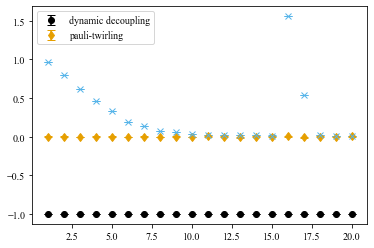

In [295]:
plt.errorbar(np.linspace(1, 20, 20), gv.mean(rdata), yerr=gv.sdev(rdata), fmt='o', capsize=4, color=colors[0], label='dynamic decoupling')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(rdatandro), yerr=gv.sdev(rdatandro), fmt='d', capsize=4, color=colors[1], label='pauli-twirling')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(r_ro_data) * 80, yerr=gv.sdev(r_ro_data), fmt='x', capsize=4, color=colors[2])
plt.legend()
plt.savefig('rescaling.pdf')

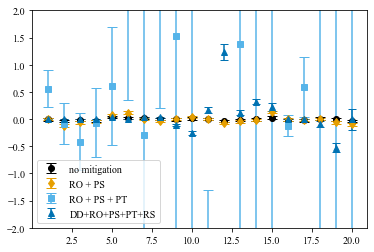

In [296]:
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata), yerr=gv.sdev(edata), fmt='o',
#              color=colors[0], capsize=4, label='N')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata_r), yerr=gv.sdev(edata_r), fmt='o', fillstyle='none',
#              color=colors[1], capsize=4, label='no readout')
# plt.plot(np.linspace(0, 20, 21), exact, 'd:', color=colors[6])
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatanothing), yerr=gv.sdev(edatanothing), fmt='o', color=colors[0], capsize=5,
             label='no mitigation')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edataro), yerr=gv.sdev(edataro), fmt='d', color=colors[1], capsize=5,
             label='RO + PS')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand_r), yerr=gv.sdev(edatand_r), fmt='s', color=colors[2], capsize=5,
             label='RO + PS + PT')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand_r), yerr=gv.sdev(edatand_r), fmt='x', 
#              color=colors[3], capsize=4, label='RO+PS+PT+RS')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata_r), yerr=gv.sdev(edata_r) / np.sqrt(30), fmt='^', 
             color=colors[5], capsize=4, label='DD+RO+PS+PT+RS')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata_r), yerr=gv.sdev(edata_r), fmt='d',
#              fillstyle='none', capsize=4, label='DD+PT+RS')
plt.ylim(-2, 2)
plt.legend()
plt.savefig('testdd+readoutcorrection.pdf')
# plt.errorbar(np.linspace(1, 20, 20), np.mean(rescale_data, axis=0),
#              yerr=np.std(rescale_data, axis=0) / np.sqrt(30), fmt='.', capsize=4)
# plt.plot(evolution_data[1])
# plt.plot(rescale_data[1])

In [297]:
evolution = np.zeros(20)
rescale = np.zeros(20)
for i in range(20):
    for key in scale_counts[i].keys():
        key2 = np.binary_repr(int(key, 16), width=3)
        if key2.count('1') % 2 == 1:
            rescale[i] += scale_counts[i][key]
        else:
            rescale[i] -= scale_counts[i][key]
    for key in evolution_counts[i].keys():
        key2 = np.binary_repr(int(key, 16), width=3)
        if key2.count('1') % 2 == 1:
            evolution[i] += evolution_counts[i][key]
        else:
            evolution[i] -= evolution_counts[i][key]
rescale /= sum(scale_counts[0].values())
evolution /= sum(evolution_counts[0].values())

NameError: name 'scale_counts' is not defined

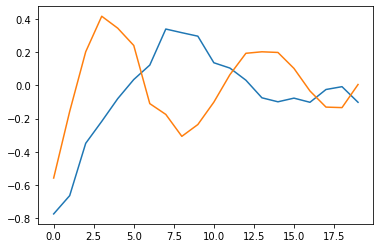

In [25]:
plt.plot(rescale)
plt.plot(evolution)